In [137]:
import sys
import os
import warnings
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings('ignore')
%matplotlib inline

In [138]:
house = pd.read_csv('/Users/linzbuoy/Desktop/train.csv')

In [139]:
house.shape

(1460, 81)

In [140]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [141]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [142]:
house.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [143]:
### Checking null values

In [144]:
round(house.isnull().sum()/len(house.index),2).sort_values(ascending=False).head(18)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageYrBlt     0.06
GarageFinish    0.06
GarageType      0.06
GarageQual      0.06
GarageCond      0.06
BsmtExposure    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtFinType2    0.03
BsmtFinType1    0.03
MasVnrType      0.01
MasVnrArea      0.01
dtype: float64

Dropping columns more than the threshold which is taken at 10%

In [145]:
round(house.isnull().sum()/len(house.index),2)[round(house.isnull().sum()/
                                                                 len(house.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [146]:
house = house.drop(['MiscFeature','Alley','Fence','PoolQC','LotFrontage','MoSold','FireplaceQu'],axis='columns')

In [147]:
house.Street.value_counts()
house.Utilities.value_counts()
house = house.drop(['Street','Utilities'],axis='columns')

In [148]:
house = house.drop('Id',axis='columns')

In [149]:
house[list(house.dtypes[house.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


EDA

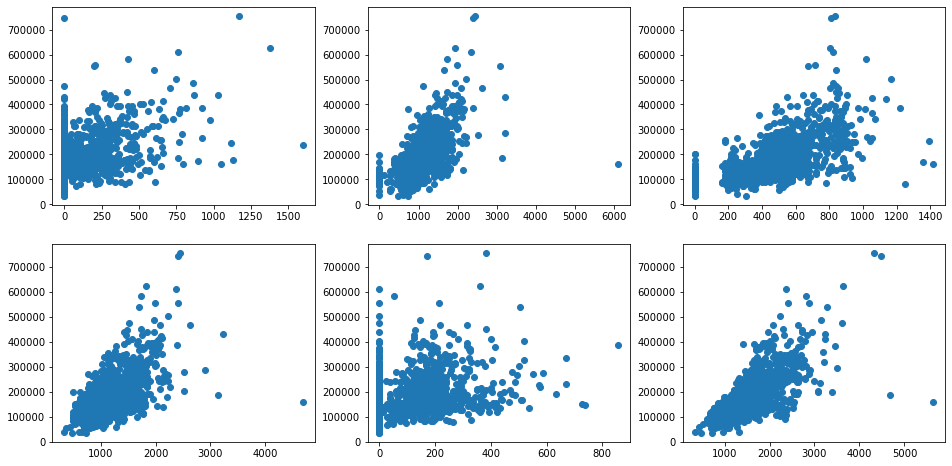

In [150]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(house.MasVnrArea,house.SalePrice)
plt.subplot(2,3,2)
plt.scatter(house.TotalBsmtSF,house.SalePrice)
plt.subplot(2,3,3)
plt.scatter(house['GarageArea'],house.SalePrice)
plt.subplot(2,3,4)
plt.scatter(house['1stFlrSF'],house.SalePrice)
plt.subplot(2,3,5)
plt.scatter(house['WoodDeckSF'],house.SalePrice)
plt.subplot(2,3,6)
plt.scatter(house['GrLivArea'],house.SalePrice)


Heatmap to know the correlation

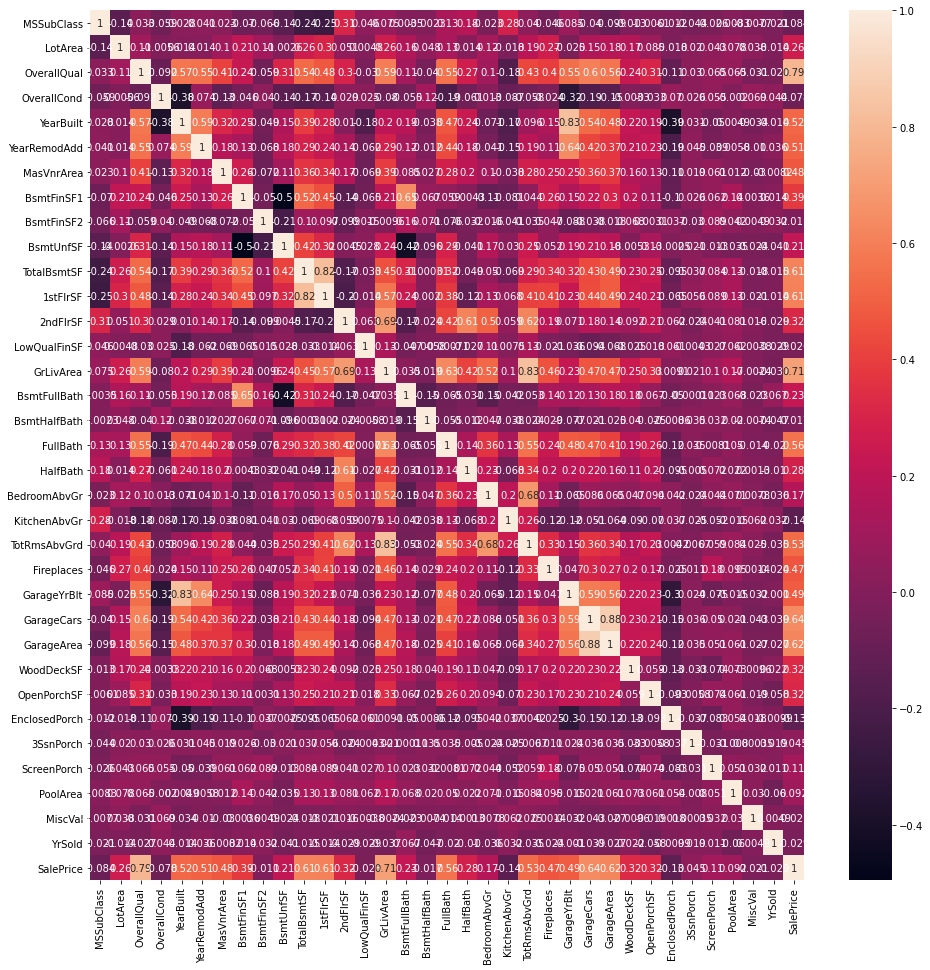

In [151]:
plt.figure(figsize=(16,16))
sns.heatmap(house[list(house.dtypes[house.dtypes!='object'].index)].corr(),annot=True)
plt.show()

Outliers - lower and upper quantile taken as 0.25 & 0.99 respectively

In [152]:
house.shape

(1460, 71)

In [153]:
num_col = list(house.dtypes[house.dtypes !='object'].index)
num_col = ['EnclosedPorch','LotArea','MasVnrArea','SalePrice','TotalBsmtSF','3SsnPorch','BsmtFinSF1','BsmtFinSF2','1stFlrSF','OpenPorchSF','GrLivArea',
           'ScreenPorch','PoolArea','MiscVal']
def outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house = outliers(house)

In [154]:
house.shape

(1433, 71)

In [155]:
house[list(house.dtypes[house.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


Check Distribution

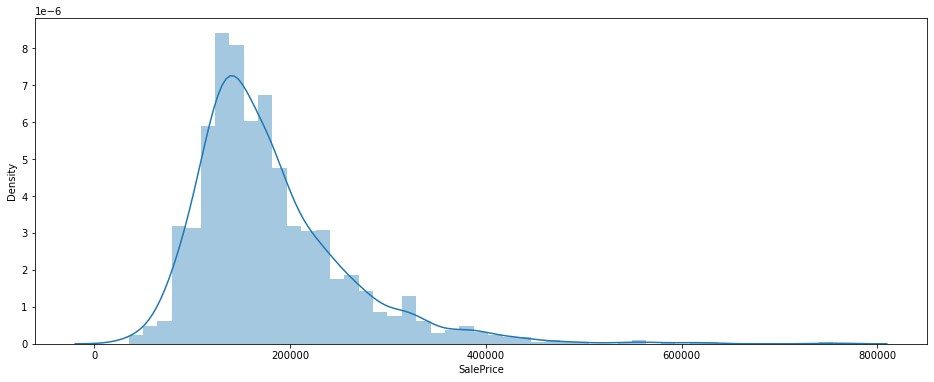

In [156]:
plt.figure(figsize=(16,6))
sns.distplot(house.SalePrice)
plt.show()

In [157]:
## Dummy variables

num_col=[]
cat_col=[]
for i in house.columns:
    if house[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
house_dummy= pd.get_dummies(house[cat_col])   
house=pd.concat([house,house_dummy],axis=1)
house= house.drop(cat_col,axis=1)        


In [158]:
house.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [159]:
X = house.drop('SalePrice',axis=1)
y = house['SalePrice']

In [160]:
corr = X.corr()
corr1 = corr[abs(corr)>=.6]
corr2 =  corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))  
corr_result = corr2.stack()
print(corr_result[(abs(corr_result) > 0.6)])

MSSubClass            BldgType_1Fam           -0.817826
OverallQual           GarageCars               0.601057
                      ExterQual_TA            -0.650698
YearBuilt             GarageYrBlt              0.824707
                      Foundation_PConc         0.652004
                                                 ...   
SaleType_New          SaleCondition_Normal    -0.645384
                      SaleCondition_Partial    0.986398
SaleType_WD           SaleCondition_Normal     0.634553
                      SaleCondition_Partial   -0.764287
SaleCondition_Normal  SaleCondition_Partial   -0.654283
Length: 82, dtype: float64


In [161]:
## test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

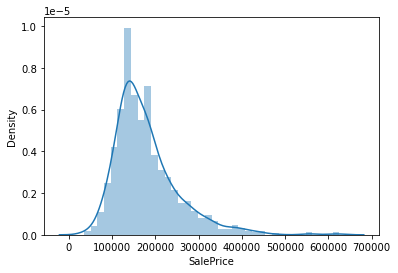

In [162]:
sns.distplot(y_train)
plt.show()

In [163]:
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

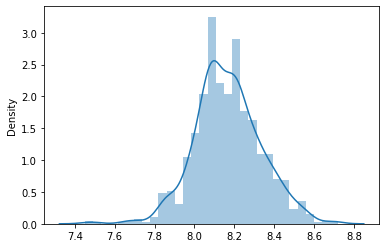

In [164]:
sns.distplot(y_train)
plt.show()

In [166]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns